In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("D:/Datasets/simple_data.csv")

In [3]:
df.head(17)

sirano      isim  yas       meslek     sehir  aylik_gelir
0        1     Cemal   35         Isci    Ankara         3500
1        2     Ceyda   42        Memur   Kayseri         4200
2        3     Timur   30     Müzisyen  Istanbul         9000
3        4     Burcu   29  Pazarlamaci    Ankara         4200
4        5   Yasemin   23  Pazarlamaci     Bursa         4800
5        6       Ali   33        Memur    Ankara         4250
6        7     Dilek   29  Pazarlamaci  Istanbul         7300
7        8     Murat   31     Müzisyen  Istanbul        12000
8        9     Ahmet   33       Doktor    Ankara        18000
9       10  Muhittin   46       Berber  Istanbul        12000
10      11  Hicaziye   47   Tuhafiyeci    Ankara         4800
11      12     Harun   43      Tornacı    Ankara         4200
12      13     Hakkı   33        Memur     Çorum         3750
13      14   Gülizar   37       Doktor     İzmir        14250
14      15    Şehmuz   41     Müzisyen    Ankara         8700
15      16    Gençay   46       Berber    Ankara         8800
16      16    Gençay   46       Berber    Ankara         8800

# !!!!!!! Hem groupby() hem de agg() içine nitelikleri liste içinde vermeyi unutmayınız !!!!!!!

In [5]:
meslek_grpby = df.groupby(["meslek"]).aylik_gelir.agg(['mean'])

In [7]:
meslek_grpby.head()

mean
meslek                
Berber     9866.666667
Doktor    16125.000000
Isci       3500.000000
Memur      4066.666667
Müzisyen   9900.000000

In [8]:
meslek_grpby.index

Index(['Berber', 'Doktor', 'Isci', 'Memur', 'Müzisyen', 'Pazarlamaci',
       'Tornacı', 'Tuhafiyeci'],
      dtype='object', name='meslek')

In [9]:
# Indeksi aynı zamanda bir sütun olarak df'e ekleyebiliriz.
meslek_grpby['meslek'] = meslek_grpby.index
meslek_grpby.head()

mean    meslek
meslek                          
Berber     9866.666667    Berber
Doktor    16125.000000    Doktor
Isci       3500.000000      Isci
Memur      4066.666667     Memur
Müzisyen   9900.000000  Müzisyen

In [10]:
# groupby içini liste halinde vermez isek çıktı Pandas.Series olur

In [11]:
df_grpby_pd_series = df.groupby("meslek").aylik_gelir.agg('mean')
df_grpby_pd_series

meslek
Berber          9866.666667
Doktor         16125.000000
Isci            3500.000000
Memur           4066.666667
Müzisyen        9900.000000
Pazarlamaci     5433.333333
Tornacı         4200.000000
Tuhafiyeci      4800.000000
Name: aylik_gelir, dtype: float64

# Pandas series dataframe yapma

In [13]:
df_grpby_pd_series.reset_index().head()

meslek   aylik_gelir
0    Berber   9866.666667
1    Doktor  16125.000000
2      Isci   3500.000000
3     Memur   4066.666667
4  Müzisyen   9900.000000

# Meslekleri kazançlarına göre sıralama

In [14]:
df_grpby_pd_series.reset_index().sort_values("meslek", ascending=False)

meslek   aylik_gelir
7   Tuhafiyeci   4800.000000
6      Tornacı   4200.000000
5  Pazarlamaci   5433.333333
4     Müzisyen   9900.000000
3        Memur   4066.666667
2         Isci   3500.000000
1       Doktor  16125.000000
0       Berber   9866.666667

# Mesleklerin kazançlarını bar grafik ile çizmek

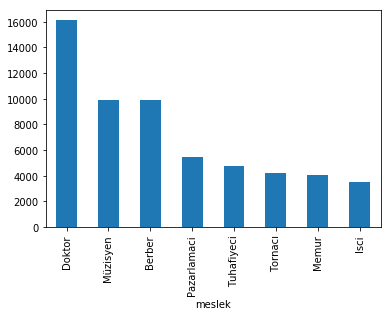

In [15]:
import matplotlib.pyplot as plt
%matplotlib inline
df.groupby("meslek").aylik_gelir.mean() \
.sort_values(ascending=False) \
.plot(kind='bar')
plt.show()

# agg() fonksiyonu ile birden fazla fonksiyon ile kümeleme

    dataframe.groupby(gruplanacak_kategorik_nitelik) \
    .kümelenecek_nümerik_nitelik \
    .agg(['fonk1','fonk2]) \
    .head()

# Birden fazla niteliği gruplama ve birden fazla nitelik üzerinde kümeleme fonksiyonu çalıştırma

In [17]:
df.groupby(["meslek","sehir"]).aylik_gelir \
.agg(['count','mean','sum']) \
.sort_values("mean", ascending=False) \
.head()

count   mean    sum
meslek   sehir                        
Doktor   Ankara        1  18000  18000
         İzmir         1  14250  14250
Berber   Istanbul      1  12000  12000
Müzisyen Istanbul      2  10500  21000
Berber   Ankara        2   8800  17600